In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
import pandas_datareader as pdr
key = "42ae9ac2e5ff7214b105e75d7e44ce719c1b8ddd"

In [ ]:
!pip install --upgrade pandas-datareader pandas

  Using cached pandas-2.2.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
Using cached pandas-2.2.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [ ]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

<ipython-input-19-08157bf6935e>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key=key)


In [ ]:
!pip install pandas==1.5.3

In [ ]:
df.to_csv('AAPL.csv')

In [ ]:
df = pd.read_csv('/content/AAPL.csv')

In [ ]:
df.head()

AttributeError: 'Index' object has no attribute '_format_flat'

   Unnamed: 0 symbol                       date   close    high     low  \
0           0   AAPL  2019-11-04 00:00:00+00:00  257.50  257.85  255.38   
1           1   AAPL  2019-11-05 00:00:00+00:00  257.13  258.19  256.32   
2           2   AAPL  2019-11-06 00:00:00+00:00  257.24  257.49  255.37   
3           3   AAPL  2019-11-07 00:00:00+00:00  259.43  260.35  258.11   
4           4   AAPL  2019-11-08 00:00:00+00:00  260.14  260.44  256.85   

     open    volume   adjClose    adjHigh     adjLow    adjOpen  adjVolume  \
0  257.33  25817952  62.295381  62.380055  61.782503  62.254254  103271808   
1  257.05  19974427  62.205870  62.462309  62.009911  62.186516   79897708   
2  256.77  18966124  62.232481  62.292962  61.780084  62.118777   75864496   
3  258.74  23735083  62.948576  63.171806  62.628288  62.781153   94940332   
4  258.69  17520495  63.120851  63.193644  62.322560  62.769021   70081980   

   divCash  splitFactor  
0     0.00          1.0  
1     0.00          1.0  
2 

In [ ]:
df.tail()

AttributeError: 'Index' object has no attribute '_format_flat'

     symbol                       date   close     high     low    open  \
1252   AAPL  2024-10-25 00:00:00+00:00  231.41  233.220  229.57  229.74   
1253   AAPL  2024-10-28 00:00:00+00:00  233.40  234.730  232.55  233.32   
1254   AAPL  2024-10-29 00:00:00+00:00  233.67  234.325  232.32  233.10   
1255   AAPL  2024-10-30 00:00:00+00:00  230.10  233.470  229.55  232.61   
1256   AAPL  2024-10-31 00:00:00+00:00  225.91  229.830  225.37  229.34   

        volume  adjClose  adjHigh  adjLow  adjOpen  adjVolume  divCash  \
1252  38802304    231.41  233.220  229.57   229.74   38802304      0.0   
1253  36087134    233.40  234.730  232.55   233.32   36087134      0.0   
1254  35417247    233.67  234.325  232.32   233.10   35417247      0.0   
1255  47070907    230.10  233.470  229.55   232.61   47070907      0.0   
1256  64370086    225.91  229.830  225.37   229.34   64370086      0.0   

      splitFactor  
1252          1.0  
1253          1.0  
1254          1.0  
1255          1.0  
1256

In [ ]:
df1 = df.reset_index()['close']

Text(0, 0.5, 'price')

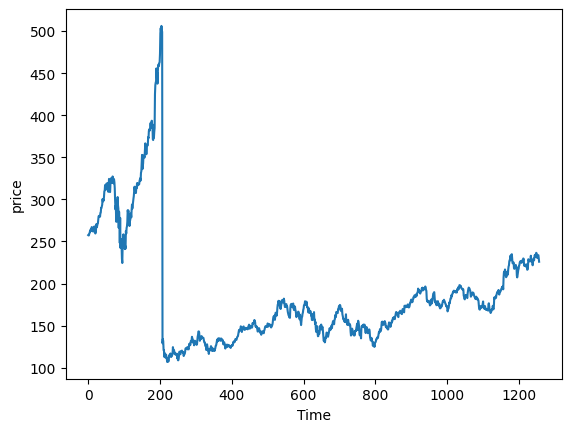

In [ ]:
plt.plot(df1, label='AAPL')
plt.xlabel('Time')
plt.ylabel('price')

Method 1 for scaling [0, 1]

In [ ]:
mini = min(df['close'])
print(mini)

106.84


In [ ]:
maxi = max(df['close'])
print(maxi)

506.09


In [ ]:
df1= (df['close']-mini)/(maxi - mini)

In [ ]:
df1.head()

AttributeError: 'Index' object has no attribute '_format_flat'

0    0.377358
1    0.376431
2    0.376706
3    0.382192
4    0.383970
Name: close, dtype: float64

Method 2 for scaling [0,1]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range= (0,1))
df['closed1'] = scaler.fit_transform(df[['close']])

In [ ]:
df.head()

AttributeError: 'Index' object has no attribute '_format_flat'

   Unnamed: 0 symbol                       date   close    high     low  \
0           0   AAPL  2019-11-04 00:00:00+00:00  257.50  257.85  255.38   
1           1   AAPL  2019-11-05 00:00:00+00:00  257.13  258.19  256.32   
2           2   AAPL  2019-11-06 00:00:00+00:00  257.24  257.49  255.37   
3           3   AAPL  2019-11-07 00:00:00+00:00  259.43  260.35  258.11   
4           4   AAPL  2019-11-08 00:00:00+00:00  260.14  260.44  256.85   

     open    volume   adjClose    adjHigh     adjLow    adjOpen  adjVolume  \
0  257.33  25817952  62.295381  62.380055  61.782503  62.254254  103271808   
1  257.05  19974427  62.205870  62.462309  62.009911  62.186516   79897708   
2  256.77  18966124  62.232481  62.292962  61.780084  62.118777   75864496   
3  258.74  23735083  62.948576  63.171806  62.628288  62.781153   94940332   
4  258.69  17520495  63.120851  63.193644  62.322560  62.769021   70081980   

   divCash  splitFactor   closed1  
0     0.00          1.0  0.377358  
1     0.

In [ ]:
correlation_matrix = df.corr()
print(correlation_matrix)

             Unnamed: 0     close      high       low      open    volume  \
Unnamed: 0     1.000000 -0.270564 -0.274223 -0.266015 -0.269582 -0.114116   
close         -0.270564  1.000000  0.999486  0.999480  0.998972 -0.511242   
high          -0.274223  0.999486  1.000000  0.999287  0.999496 -0.502038   
low           -0.266015  0.999480  0.999287  1.000000  0.999519 -0.519549   
open          -0.269582  0.998972  0.999496  0.999519  1.000000 -0.510132   
volume        -0.114116 -0.511242 -0.502038 -0.519549 -0.510132  1.000000   
adjClose       0.918070 -0.310350 -0.314932 -0.305900 -0.309707  0.005548   
adjHigh        0.917669 -0.314273 -0.317941 -0.309495 -0.312641  0.018844   
adjLow         0.918493 -0.309243 -0.313490 -0.303872 -0.307606 -0.004901   
adjOpen        0.917362 -0.312580 -0.316174 -0.307139 -0.309976  0.008132   
adjVolume     -0.603324  0.341924  0.355858  0.329081  0.341833  0.452147   
divCash       -0.053597  0.083606  0.083556  0.084552  0.085209 -0.055140   

<ipython-input-30-becb50483c66>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


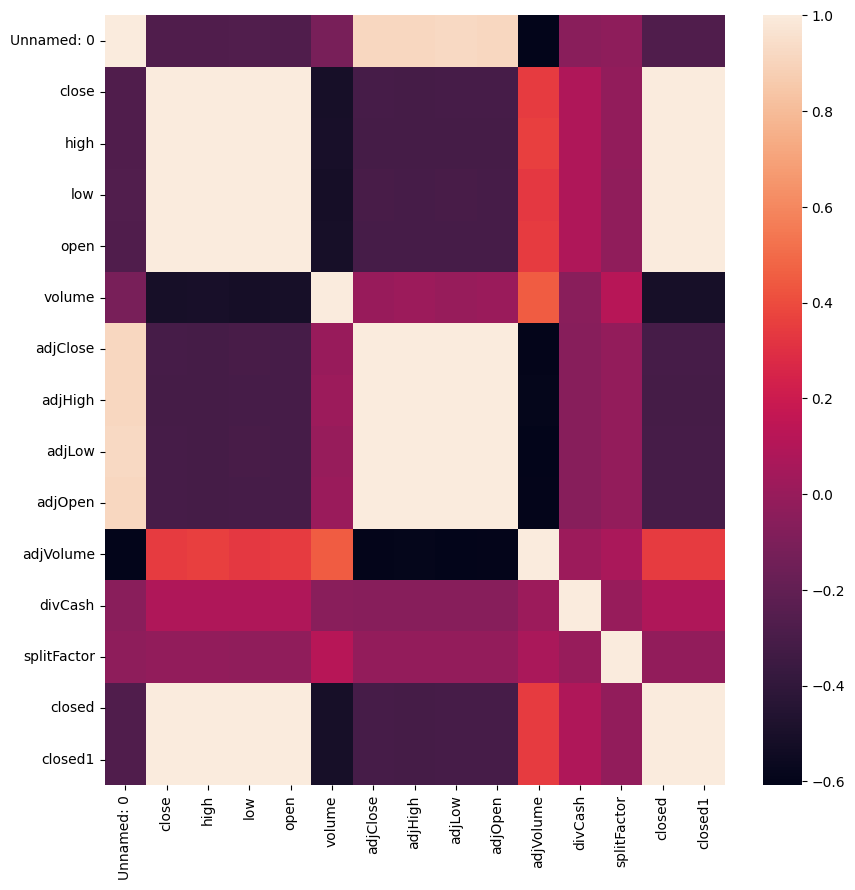

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix)
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [ ]:
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size], df1[training_size:len(df)]

In [ ]:
train_data

AttributeError: 'Index' object has no attribute '_format_flat'

0      0.377358
1      0.376431
2      0.376706
3      0.382192
4      0.383970
         ...   
812    0.092974
813    0.097909
814    0.090570
815    0.093801
816    0.096656
Name: close, Length: 817, dtype: float64

In [ ]:
test_data

AttributeError: 'Index' object has no attribute '_format_flat'

817     0.110157
818     0.119374
819     0.112436
820     0.119750
821     0.112912
          ...   
1252    0.312010
1253    0.316994
1254    0.317671
1255    0.308729
1256    0.298234
Name: close, Length: 440, dtype: float64

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset.iloc[i:(i+time_step)].values   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset.iloc[i + time_step])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape, y_train.shape)

(716, 100) (716,)


In [ ]:
print(X_test.shape, ytest.shape)

(339, 100) (339,)


In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, y_train, validation_data = (X_test, ytest), epochs = 10, verbose= 64)

Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.17.0'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

185.9054461092008

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

198.36486591341009

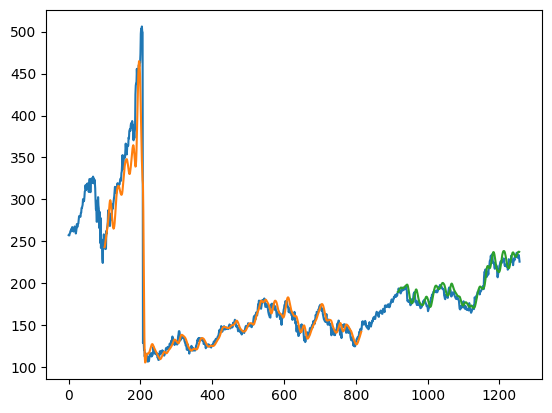

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:] = np.nan
# Reshape train_predict to a 1D array to match trainPredictPlot
trainPredictPlot[look_back:len(train_predict)+look_back] = train_predict.reshape(-1) # This line is changed

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:] = np.nan # Changed this line to use single index

# Reshape test_predict to a 1D array and fix the slice assignment
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1] = test_predict.reshape(-1)  # This line is changed

# plot baseline and predictions
# Reshape df1 to a 2D array for inverse_transform
plt.plot(scaler.inverse_transform(df1.values.reshape(-1, 1))) # This line is changed
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

440

In [ ]:
x_input=test_data[341:].values.reshape(1,-1)
x_input.shape

(1, 99)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.2660738885410144,
 0.26900438321853476,
 0.2646211646837821,
 0.275090795241077,
 0.26912961803381336,
 0.2575829680651221,
 0.25209768315591735,
 0.2537257357545397,
 0.25605510331872255,
 0.26652473387601755,
 0.2686537257357545,
 0.25993738259236066,
 0.27529117094552286,
 0.28410770194113966,
 0.28731371321227306,
 0.29931120851596743,
 0.3030181590482154,
 0.30517219787100813,
 0.3159423919849718,
 0.3023919849718221,
 0.3098309329993738,
 0.3194990607388854,
 0.320551033187226,
 0.3056731371321227,
 0.2939010644959299,
 0.29422667501565436,
 0.29335003130870385,
 0.2959799624295554,
 0.2797745773324984,
 0.27714464621164686,
 0.2783218534752661,
 0.2790231684408266,
 0.2804257983719474,
 0.2886412022542267,
 0.27932373199749533,
 0.2830807764558548,
 0.2565560425798372,
 0.2514464621164683,
 0.2579336255479023,
 0.2666750156543519,
 0.2740137758296807,
 0.27724483406386974,
 0.2866123982467126,
 0.2877395115842204,
 0.29525360050093924,
 0.2985848465873513,
 0.2981840951784595

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, len(x_input[0]), 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

0 day input [0.26900438 0.26462116 0.2750908  0.26912962 0.25758297 0.25209768
 0.25372574 0.2560551  0.26652473 0.26865373 0.25993738 0.27529117
 0.2841077  0.28731371 0.29931121 0.30301816 0.3051722  0.31594239
 0.30239198 0.30983093 0.31949906 0.32055103 0.30567314 0.29390106
 0.29422668 0.29335003 0.29597996 0.27977458 0.27714465 0.27832185
 0.27902317 0.2804258  0.2886412  0.27932373 0.28308078 0.25655604
 0.25144646 0.25793363 0.26667502 0.27401378 0.27724483 0.2866124
 0.28773951 0.2952536  0.29858485 0.2981841  0.29973701 0.29946149
 0.29477771 0.30056356 0.30141515 0.30354415 0.29968691 0.30795241
 0.3059737  0.29036944 0.28556043 0.28939261 0.28548528 0.28571071
 0.28370695 0.29009393 0.29036944 0.28969317 0.27421415 0.27539136
 0.28515967 0.30564809 0.30396994 0.29963682 0.30189105 0.29938635
 0.30226675 0.30294302 0.31599249 0.2989856  0.30041327 0.29763306
 0.30046337 0.28766437 0.29788353 0.30732624 0.30607389 0.30234189
 0.3117345  0.31812148 0.31293676 0.31386349 0.3210

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
len(df1)

1257

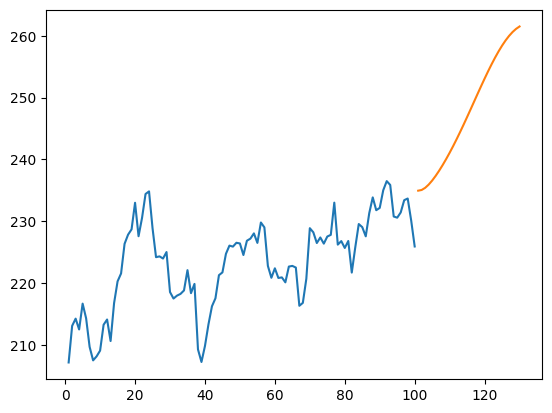

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Assuming 'scaler' is your defined scaler object

plt.plot(day_new, scaler.inverse_transform(df1[1157:].values.reshape(-1, 1))) # Reshape to 2D
plt.plot(day_pred, scaler.inverse_transform(lst_output))

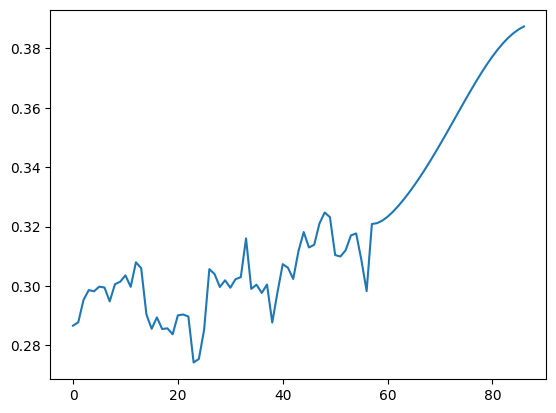

In [ ]:
df3=df1.tolist()
df3.extend([item for sublist in lst_output for item in sublist])
plt.plot(df3[1200:])

In [ ]:
import numpy as np

df3 = df1.tolist()
# Flatten lst_output to a 1D list
df3.extend([item for sublist in lst_output for item in sublist])
# Now df3 contains only single numerical values
df3 = np.array(df3).reshape(-1, 1)  # Reshape to a 2D array with one column
df3 = scaler.inverse_transform(df3).tolist()

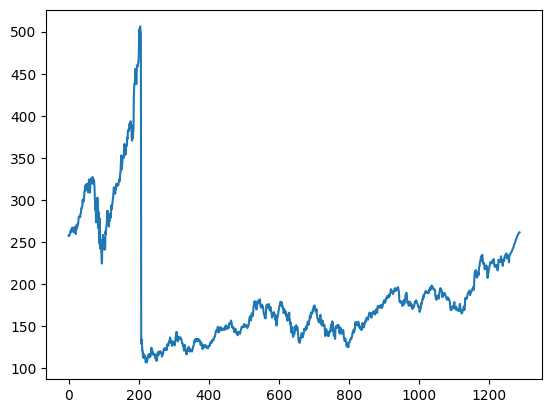

In [ ]:
plt.plot(df3)